In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

from nltk.corpus import stopwords
import nltk; nltk.download("stopwords")

%matplotlib inline

[nltk_data] Downloading package stopwords to /Users/David/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [197]:
blog_df = pd.read_csv('blog_text.csv', index_col = 0)

In [198]:
linkedin_df = pd.read_csv('linkedin_with_text.csv', parse_dates = [6])

In [199]:
def clean_text(x):
    return x.replace("\\'", "'").replace('[', '').replace(']', '')

In [5]:
linkedin_df.body = linkedin_df.body.map(lambda x: clean_text(x))

In [6]:
linkedin_df = linkedin_df.groupby('title').max()

In [135]:
vect = CountVectorizer(decode_error = 'ignore', stop_words=  'english')
vec_df = pd.DataFrame()
for text, title in zip(linkedin_df.body, linkedin_df.index):
    vect.fit([text])
    row_vec = vect.transform([text])
    blog_row = pd.DataFrame(row_vec.toarray(), columns=vect.get_feature_names(), index = [title])
    vec_df = pd.concat([vec_df, blog_row])

In [136]:
for text, title in zip(blog_df.Blogs, blog_df.index):
    vect.fit([text])
    row_vec = vect.transform([text])
    blog_row = pd.DataFrame(row_vec.toarray(), columns=vect.get_feature_names(), index = [title])
    vec_df = pd.concat([vec_df, blog_row])

In [137]:
vec_df = vec_df.fillna(0)

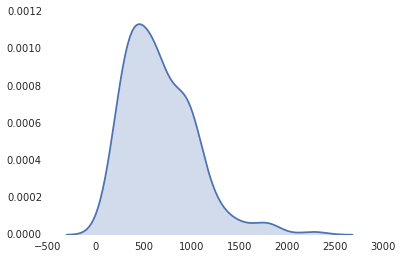

In [138]:
sns.kdeplot(vec_df.sum(axis = 1), shade = True)

In [139]:
word_count = vec_df.sum(axis=1)

In [160]:
pca = PCA(n_components= 2)
X = pca.fit_transform(ve c_df)

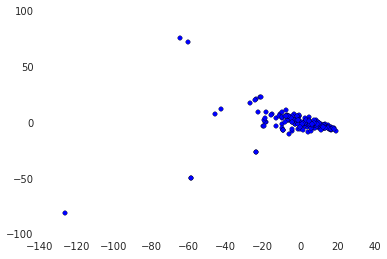

In [161]:
plt.scatter(X[:,0], X[:,1])

In [162]:
vec_df = vec_df.sort_index()

In [163]:
d = {}
for rowNo, row in vec_df.iterrows():
    sim_list = []
    for rowNo2, row2 in vec_df.iterrows():
        sim_list.append(cosine_similarity(row,row2)[0][0])
    d[rowNo] = sim_list

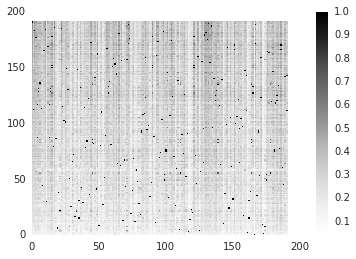

In [190]:
sim_df.index = sim_df.columns
sim_df = pd.DataFrame(d)
sim_df = sim_df.sort(columns = sim_df.columns[0])
from pylab import pcolor, show, colorbar, xticks, yticks
pcolor(sim_df)
colorbar()
show()

In [191]:
sim_df = pd.DataFrame(d)

In [192]:
pca = PCA(n_components= 2)
X = pca.fit_transform(sim_df)

In [193]:
pca_sim = pd.DataFrame(X, index = sim_df.columns).sort(columns = 0)

In [194]:
pca_sim['word_count'] = word_count

In [177]:
pca_sim.corr()

,0,1,word_count
0,1.000000e+00,2.528599e-16,-0.585075
1,2.528599e-16,1.000000e+00,0.292240
word_count,-5.850746e-01,2.922397e-01,1.000000


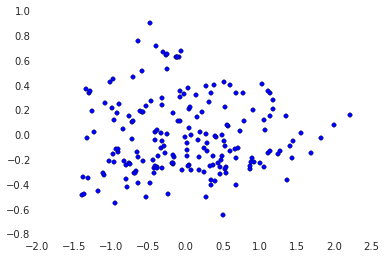

In [179]:
plt.scatter(X[:,0], X[:,1])

In [16]:
sim_df.index = sim_df.columns.tolist()